# TKT4108 Structural dynamics 2

## Solution Exercise 7

**Main topics:** Signal processing and system identification

**References:** Jupyter notebook examples 

### Problem 1: Auto-spectral density of wind turbulence

The auto-spectral density of the horizontal along wind component u is defined as follows in N400

$$\frac{S_u(n)n}{\sigma_u^2} = \frac{ A_{u} \hat{n}_u}{\left(1+ 1.5 A_u \hat{n}_u  \right)^{\frac{5}{3}}} $$

$$\hat{n}_u = \frac{n {}^xL_u}{V} $$

a) Explain what the following symbols represent

$$ \sigma_u^2 $$

$$ A_{u}  $$

$$\hat{n}_u$$

$$ {}^x{L_u} $$

#### Solution

The symbol $\sigma_u^2$ represents the variance of the turbulence component. The parameter $A_u$ is a property of turbulence. It controls, together with the integral length scale, how much energy is in the spectra located at low frequencies. The integral length scale ${}^x{L_u}$ can be viewed as an average eddy length. Increasing the integral length scale moves the frequency content in the turbulence to lower frequencies.


b) The expression in N400 is defined using the frequency $n$ in Hz. Show that the equivalent expression for a frequency $\omega$ in $rad/s$ is defined by:

$$\frac{S_u(\omega)\omega}{\sigma_u^2} = \frac{ \frac{Au}{2\pi} \hat{\omega}_u}{\left(1+ 1.5 \frac{Au}{2\pi} \hat{\omega}_u  \right)^{\frac{5}{3}}} $$

Explain why it is necessary to ensure that the integral of the spectral density is the same for both definitions

$$ \int_{-\infty}^{\infty} S_u(\omega)d\omega = \int_{-\infty}^{\infty} S_u(n)dn $$


#### Solution
We have to introduce the relation $\omega = 2 \pi n$, and we also need to ensure that the variance of the process stays the same by keeping the area under the spectral density constant. By going from a frequency in Hz to a frequency in rad/s, we stretch the frequency axis and make the area larger. We thus need to divide the spectral density by $2\pi$ to keep the area the same.

<img src="fig_7_1.svg">

We can then insert this into the equation in N400. We start by converting the reduced frequency.

$$\hat{n}_u = \frac{n {}^xL_u}{V} $$

$$\hat{\omega}_u = \frac{\omega {}^xL_u}{V} $$

$$\hat{\omega}_u = 2 \pi \hat{n}_u $$

We can then introduce the relations in the auto-spectral density of the turbulence component.

$$\frac{S_u(\omega) 2 \pi \frac{\omega}{2 \pi}}{\sigma_u^2} = \frac{ A_{u} \frac{\hat{\omega_u}}{2\pi}}{\left(1+ 1.5 A_u \frac{\hat{\omega_u}}{2\pi}  \right)^{\frac{5}{3}}} $$


$$\frac{S_u(\omega) \omega }{\sigma_u^2} = \frac{  \frac{A_{u}}{2\pi} \hat{\omega_u}}{\left(1+ 1.5  \frac{A_u}{2\pi} \hat{\omega_u}  \right)^{\frac{5}{3}}} $$

    

c) Plot the normalized auto-spectral density as a function of $\hat{\omega}_{u}$

$$\frac{S_u(\omega)\omega}{\sigma_u^2} $$ 

Assume $A_u = 6.8$. Also, investigate how the auto-spectral density changes when $A_u$ increases and decreases by 20%.    

#### Solution

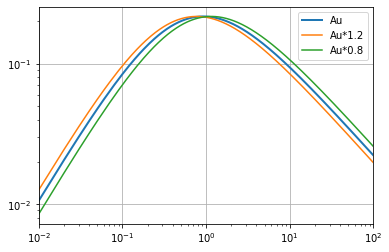

In [26]:
import numpy as np
from matplotlib import pyplot as plt
Au = 6.8
w_n = np.arange(0,100,0.01)

def Su_norm(w_n,Au):
    Su_n = Au/2/np.pi*w_n / ((1 + 1.5 * Au/2/np.pi * w_n)**(5/3))
    return Su_n

plt.figure()
plt.plot(w_n,Su_norm(w_n,Au),label = "Au", linewidth=2 )
plt.plot(w_n,Su_norm(w_n,1.2*Au),label = "Au*1.2" )
plt.plot(w_n,Su_norm(w_n,0.8*Au),label = "Au*0.8" )
plt.xscale("log")
plt.yscale("log")
plt.grid()
plt.legend()

plt.xlim(0.01, 100);

The plot shows that the parameter $A_u$ controls the peak position in the reduced auto-spectral density. The peak moves to the left when $A_u$ increases and to the right when it decreases.

### Problem 2: Co-spectral density of wind turbulence
The co-spectral density of the horizontal turbulence component $u$ for two points with a separation of $\Delta y$ meters is defined as

$$S_{uu}(\omega,\Delta y) = S_u(\omega)\hat{Co}(\omega, \Delta y) $$

The co-spectral density is defined as

$$ \hat{Co}(\omega, \Delta y) =  \exp \left( - C_u \frac{ \omega \Delta y}{V} \right) $$

Assume that the mean wind velocity is $V=20m/s$, the turbulence intensity is $I_u = 0.15$, the integral length scale $^xL_u = 100m$ and $C_u = 1$

a) Plot the co-spectral density of the turbulence components for the following separation distances $\Delta y = \left[0, 10, 20 ,30 ,40, 50 \right]$

#### Solution

We can start by rewriting the expression for the auto-spectral density.

$$\frac{S_u(\omega) \omega }{\sigma_u^2} = \frac{  \frac{A_{u}}{2\pi} \hat{\omega_u}}{\left(1+ 1.5  \frac{A_u}{2\pi} \hat{\omega_u}  \right)^{\frac{5}{3}}} $$

$$S_u(\omega) = \frac{ \sigma_u^2  \frac{A_{u}}{2\pi} \frac{{}^xL_u}{V}}{\left(1+ 1.5  \frac{A_u}{2\pi} \hat{\omega_u}  \right)^{\frac{5}{3}}} $$

We introduce the definition of turbulence intensity.

$$I_u = \frac{\sigma_u}{V} $$

$$S_u(\omega) = \frac{ I_u^2 V  \frac{A_{u}}{2\pi} {}^xL_u}{\left(1+ 1.5  \frac{A_u}{2\pi} \hat{\omega_u}  \right)^{\frac{5}{3}}} $$



(0.0, 20.0)

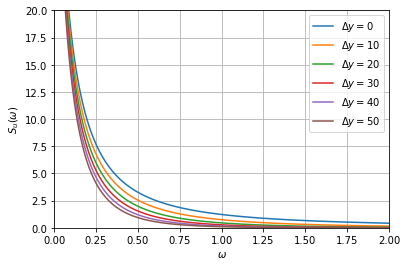

In [75]:
w = np.arange(0,20,0.01)

dy = np.array([0, 10, 20, 30, 40, 50])

Suu = np.zeros((len(dy),len(w)))
Iu = 0.15
V = 20.0
xLu = 100
Cu = 1
plt.figure()
for k in range(len(dy)):
    Suu[k,:] = (Iu**2*V*Au/2/np.pi*xLu /( (1+ 1.5 *Au/2/np.pi*w*xLu/V)**(5/3)) )*np.exp(-Cu*w*dy[k]/V)
    plt.plot(w,Suu[k,:],label= "$\Delta y= $" + str(dy[k]) )

plt.grid()
plt.legend()
plt.xlabel("$\omega$")
plt.ylabel("$S_u(\omega)$")
plt.xlim(0,2)
plt.ylim(0,20)


b) Use the co-spectral density to calculate the covariance coefficient for the turbulence as a function of $\Delta y$. Plot the results and explain what you see.

#### Solution
The correlation coefficient is defined as follows

$$ \rho(\Delta y) = \frac{\sigma_{u_1u_2} (\Delta y)}{\sigma_{u_1} \sigma_{u_2} } $$

Here $\sigma_{u_1u_2} (\Delta y)$ is the covariance of the turbulence at a separation distance $\Delta y$ and $\sigma_{u_1}$, and $\sigma_{u_2}$ are the standard deviation of the turbulence in point 1 and 2. The standard deviation can be obtained from the turbulence intensity and the mean wind velocity $\sigma_{u_1} = I_uV$.

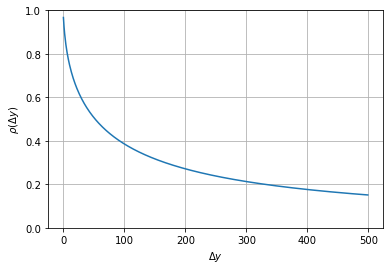

In [101]:
dy = np.arange(0,500,1)

rho_u = np.zeros(len(dy))
Iu = 0.15
V = 20.0
xLu = 100
Cu = 1

for k in range(len(dy)):
    Suu = (Iu**2*V*Au/2/np.pi*xLu /( (1+ 1.5 *Au/2/np.pi*w*xLu/V)**(5/3)) )*np.exp(-Cu*w*dy[k]/V)
    rho_u[k] = np.trapz(Suu,w) / (Iu*V *Iu*V)


plt.figure()
plt.plot(dy,rho_u)
plt.grid()
#plt.legend()
plt.xlabel("$\Delta y$")
plt.ylabel(r"$\rho(\Delta y)$")
plt.ylim(0,1);

The figure above illustrates that the correlation of the turbulence decreases as the distance increases. The correlation is fairly large for very large separation distances. The large-scale turbulence mainly causes this at very low frequencies, as the figure in problem a illustrates. One should also remember that the used normalized co-spectral density describes the extremely low-frequency turbulence as perfectly correlated, which is not valid. The model should thus be used carefully for very low frequencies.